In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Credit Card Customer Data with Clustering and RFM**

### **Getting to know the data**

In [2]:
df = pd.read_csv("credit_card_customer_data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
# Rearrange the columns
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [4]:
df.shape

(660, 7)

In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
# Renaming columns names

col_map = {
'Sl_No':"si_no", 
'Customer Key':"customer_key", 
'Avg_Credit_Limit':'avg_credit_limit',
'Total_Credit_Cards':'total_credit_cards',
'Total_visits_bank':'total_visits_bank', 
'Total_visits_online':'total_visits_online', 
'Total_calls_made':'total_calls_made'
}

In [8]:
df.rename(columns=col_map,inplace=True)

In [9]:
df.head()

,si_no,customer_key,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [10]:
# checking forr null values
df.isna().sum()

si_no                  0
customer_key           0
avg_credit_limit       0
total_credit_cards     0
total_visits_bank      0
total_visits_online    0
total_calls_made       0
dtype: int64

In [11]:
# Checking for duplicates 
df.duplicated().sum()

0

Serial number and custom key will be dropped because clustering analysis will aid us in labelling the data into respective groups

In [12]:
df_new = df.drop(columns=['si_no','customer_key'])

In [13]:
df_new.head()

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [14]:
# Checking again for duplicates
df_new.duplicated().sum()

11

In [15]:
# Dropping duplicates
df_new.drop_duplicates(inplace=True)

In [16]:
# Checking again for duplicates
df_new.duplicated().sum()

0

### **Exploratory Data Analysis**

**Memory Adjustments**


| Data-Type | Precision |
| ----------- | ----------- |
float16   | 3
float32   | 6
float64   | 15
float128  | 18

--------------------------------- 


|Data type |min|max|
| ----------- | ----------- |----------- |
|int8|-128|127|
|int16|-32768|32767|
|int32|-2147483648|2147483647|
|int64|-9223372036854775808|9223372036854775807|

In [17]:
df_new.describe()

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,34878.274268,4.708783,2.397535,2.624037,3.590139
std,37813.736638,2.173763,1.625148,2.952888,2.877911
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,11000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,49000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


With the above tables, the memory shall be readjusted.

In [18]:
df_new.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   avg_credit_limit     649 non-null    int64
 1   total_credit_cards   649 non-null    int64
 2   total_visits_bank    649 non-null    int64
 3   total_visits_online  649 non-null    int64
 4   total_calls_made     649 non-null    int64
dtypes: int64(5)
memory usage: 30.4 KB


In [19]:
df_new__memory = df_new.astype({
                'avg_credit_limit':'int32', 
                'total_credit_cards':'int8',  
                'total_visits_bank':'int8', 
                'total_visits_online':'int8',
                'total_calls_made':'int8',
                })
df_new__memory.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   avg_credit_limit     649 non-null    int32
 1   total_credit_cards   649 non-null    int8 
 2   total_visits_bank    649 non-null    int8 
 3   total_visits_online  649 non-null    int8 
 4   total_calls_made     649 non-null    int8 
dtypes: int32(1), int8(4)
memory usage: 10.1 KB


In [20]:
# fig, ax = plt.subplots(2,2, figsize=(10,10))
# sns.set_theme(style='darkgrid')
# # fontdict={"fontsize":100,"fontfamily":'monospace'}

# # Histogram
# plot1 = sns.histplot(data=df_new__memory, kde=True,x= 'avg_credit_limit',ax=ax[0,0])
# plot2 = sns.boxplot(data=df_new__memory, y= 'avg_credit_limit',ax=ax[0,1])
# plt.subplots_adjust(wspace = 0.4)

# Refer to these ones
# chap12, 14, veh_copy_git projects on computer

In [21]:
def Hist_Box(data, var):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax = ax.ravel()
    sns.set_theme(style='darkgrid')
    fontdict={"fontsize":14,"fontfamily":'monospace'}

    # Histogram and Box plot
    plot1 = sns.histplot(data=data, kde=True,x= var,ax=ax[0])
    plot2 = sns.boxplot(data=data, x=var,ax=ax[1])

    # Editing the title and labels
    plot1.set_title(f'Skewness of {var} is: {np.around(data[var].skew(axis=0),3)}',fontdict=fontdict)
    plt.subplots_adjust(wspace = 0.4)

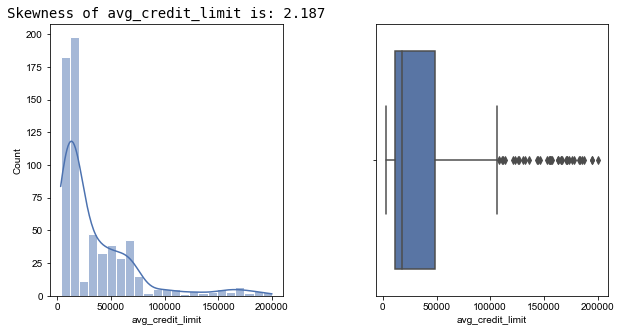

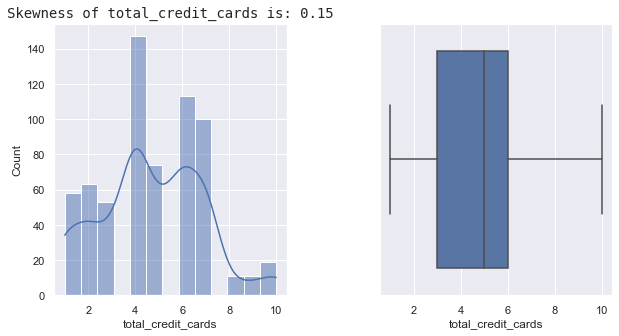

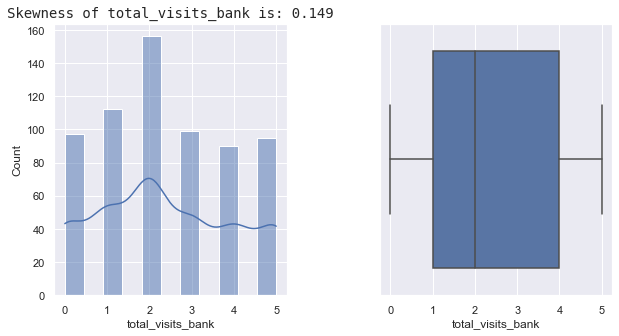

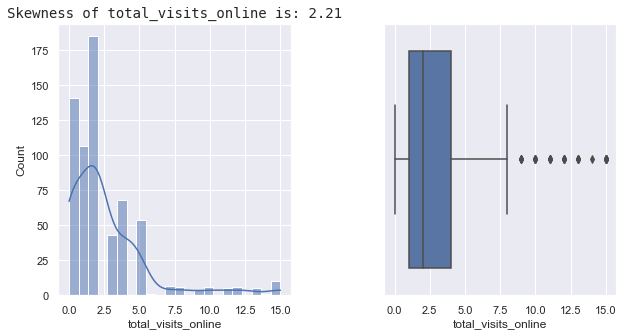

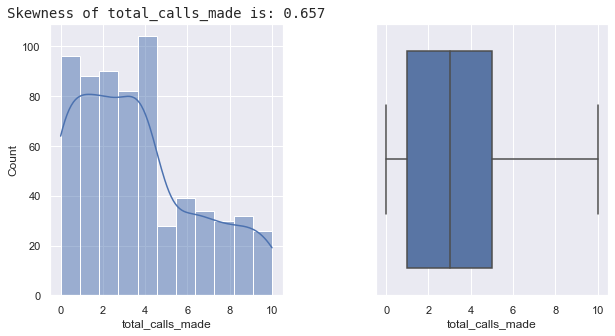

In [22]:
for col in df_new__memory.columns:
    Hist_Box(df_new__memory,col)

As we can see total visits online and average credit limit has skewness values of 2.21 & 2.187 respectively.

Levels of skewness
1. (-0.5,0.5) = lowly skewed
2. (-1.0-0.5) U (0.5,1) = Moderately skewed
3. (-1 & beyond ) U (1 & beyond) = Highly skewed

There are different ways of addressing the outliers
- Use of log
- Use of IQR
- Quantile-based Flooring and Capping
- Use of Z-score
- Use of median values
- Use of combinations
    - Use of log with median values
    - Use of log with Z-score

### **Skewness adjustments**

Use of log

In [23]:
df_new__memory.shape

(649, 5)

In [24]:
df_log = df_new__memory.copy()

In [25]:
df_log.columns

Index(['avg_credit_limit', 'total_credit_cards', 'total_visits_bank',
       'total_visits_online', 'total_calls_made'],
      dtype='object')

In [26]:
to_log = ['avg_credit_limit', 'total_visits_online']

In [27]:
for value in to_log:
    log = (f'{value}_log')
    df_log[log] = df_log[value].apply(lambda x: np.log(x+1))

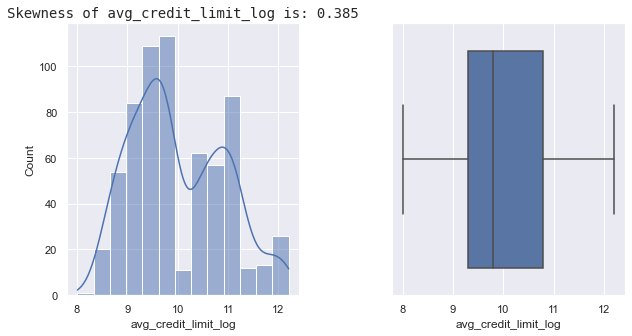

In [28]:
Hist_Box(df_log,'avg_credit_limit_log')

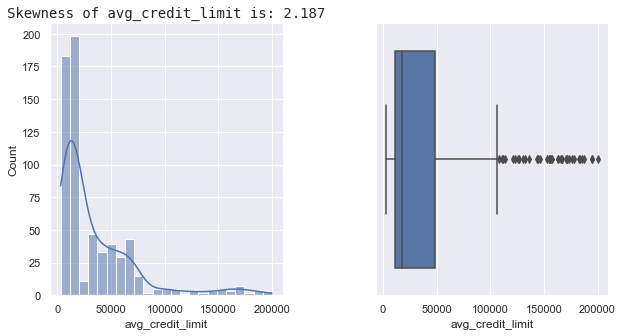

In [29]:
Hist_Box(df_log,'avg_credit_limit')

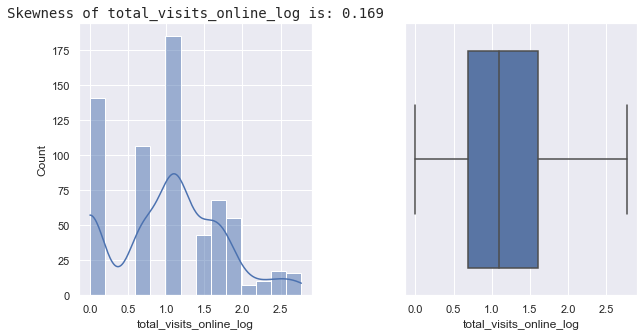

In [30]:
Hist_Box(df_log,'total_visits_online_log')

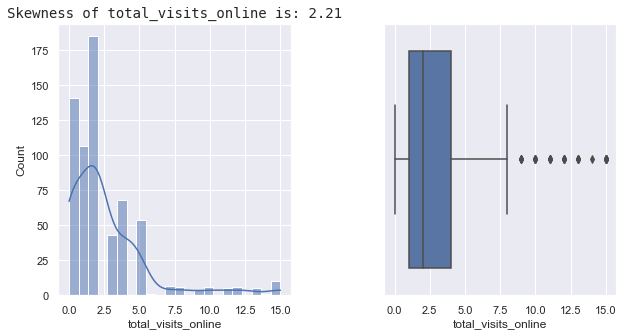

In [31]:
Hist_Box(df_log,'total_visits_online')

The skewness has reduced significantly

Use of IQR

In [32]:
df_iqr = df_new__memory.copy()

In [33]:
df_iqr.shape

(649, 5)

In [34]:
df_iqr.columns

Index(['avg_credit_limit', 'total_credit_cards', 'total_visits_bank',
       'total_visits_online', 'total_calls_made'],
      dtype='object')

In [35]:
Q_1 = df_iqr.avg_credit_limit.quantile(0.25)
Q_3 = df_iqr.avg_credit_limit.quantile(0.75)
IQR = Q_3 - Q_1 
lower_bound = Q_1 - (1.5* IQR)
upper_bound = Q_3 + (1.5* IQR)
IQR_treatment = ((df_iqr.avg_credit_limit < lower_bound) | (df_iqr.avg_credit_limit > upper_bound))
df_iqr = df_iqr[~IQR_treatment]
df_iqr.shape

(611, 5)

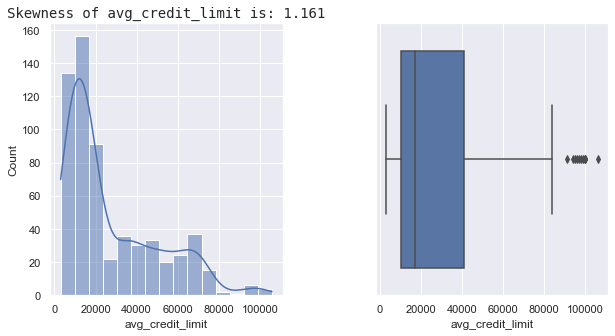

In [36]:
Hist_Box(df_iqr,'avg_credit_limit')

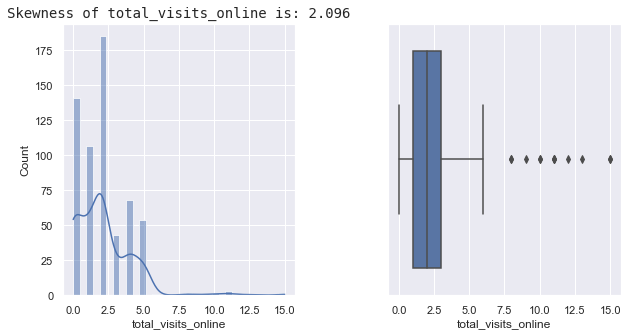

In [37]:
Hist_Box(df_iqr,'total_visits_online')

In [38]:
Q_1 = df_iqr.total_visits_online.quantile(0.25)
Q_3 = df_iqr.total_visits_online.quantile(0.75)
IQR = Q_3 - Q_1 
lower_bound = Q_1 - (1.5* IQR)
upper_bound = Q_3 + (1.5* IQR)
IQR_treatment = ((df_iqr.total_visits_online < lower_bound) | (df_iqr.total_visits_online > upper_bound))
df_iqr = df_iqr[~IQR_treatment]
df_iqr.shape

(599, 5)

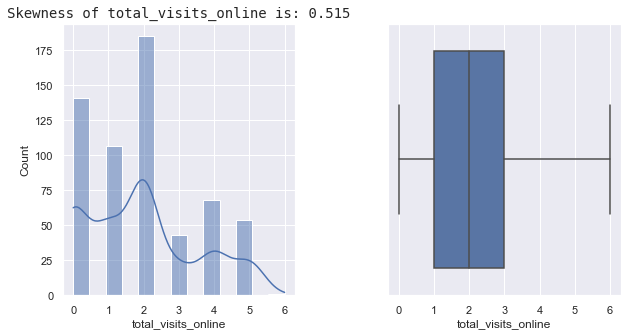

In [39]:
Hist_Box(df_iqr,'total_visits_online')

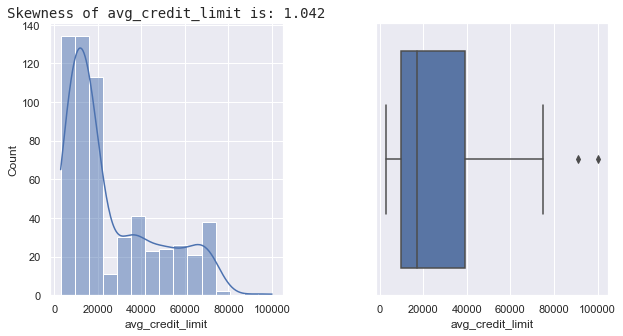

In [40]:
Hist_Box(df_iqr,'avg_credit_limit')

There is a reduction in the skewness using IQR treatment

Quantile-based Flooring and Capping

In [41]:
df_flooring = df_new__memory.copy()

In [42]:
Q_1 = np.quantile(df_flooring['avg_credit_limit'],0.25)
Q_3 = np.quantile(df_flooring['avg_credit_limit'],0.75)
IQR = Q_3 - Q_1 
lower_bound = Q_1 - (1.5* IQR)
upper_bound = Q_3 + (1.5* IQR)
df_flooring['avg_credit_limit'] = np.where(
    df_flooring['avg_credit_limit']> upper_bound,upper_bound,
    np.where(df_flooring['avg_credit_limit']<lower_bound,lower_bound,
    df_flooring['avg_credit_limit'])) # Use of boundary  quantile capping

In [43]:
df_flooring.shape

(649, 5)

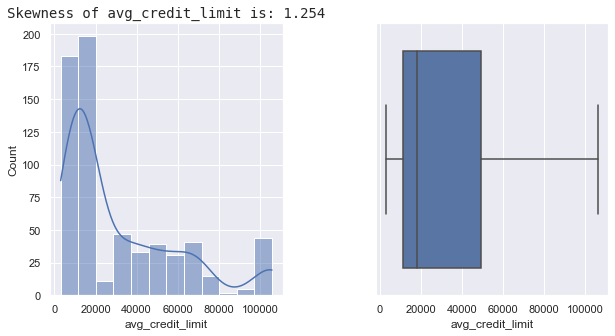

In [44]:
Hist_Box(df_flooring,'avg_credit_limit')

In [45]:
Q_1 = np.quantile(df_flooring['total_visits_online'],0.25)
Q_3 = np.quantile(df_flooring['total_visits_online'],0.75)
IQR = Q_3 - Q_1 
lower_bound = Q_1 - (1.5* IQR)
upper_bound = Q_3 + (1.5* IQR)
df_flooring['total_visits_online'] = np.where(
    df_flooring['total_visits_online']> upper_bound,upper_bound,
    np.where(df_flooring['total_visits_online']<lower_bound,lower_bound,
    df_flooring['total_visits_online'])) # Use of boundary  quantile capping

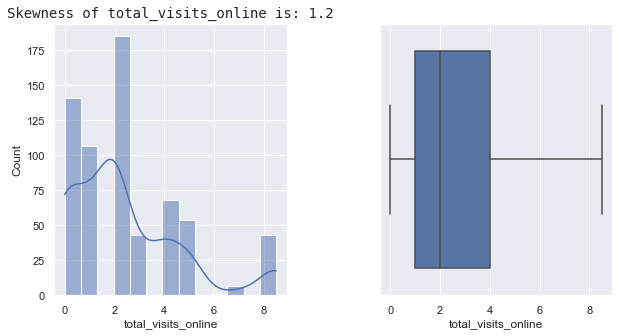

In [46]:
Hist_Box(df_flooring,'total_visits_online')

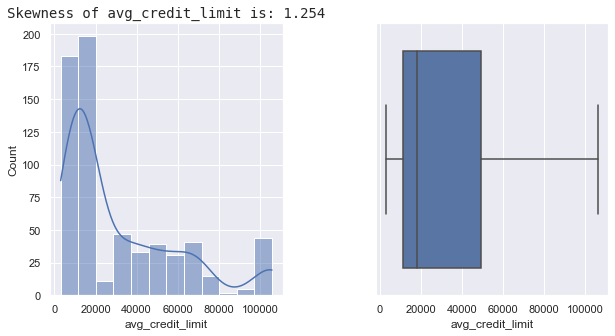

In [47]:
Hist_Box(df_flooring,'avg_credit_limit')

Use of Z-score

We can make use of z score when;
- Data points that fall outside of 2 standard devitaions
- Data points that fall outside of 3 standard devitaions

In [48]:
df_z = df_new__memory.copy()

In [49]:
df_z.shape

(649, 5)

In [50]:
from scipy import stats

In [51]:
z = np.abs(stats.zscore(df_z.avg_credit_limit))
# z

In [52]:
# If a data point, df > 3std,  then it is an outlier
threshold = 3
print(np.where(z>threshold))

(array([601, 603, 608, 610, 611, 612, 613, 615, 618, 619, 620, 621, 622,
       626, 627, 628, 634, 635, 636, 639, 641, 643, 647, 648], dtype=int64),)


In [53]:
df_z = df_z[z<3]
df_z.shape

(625, 5)

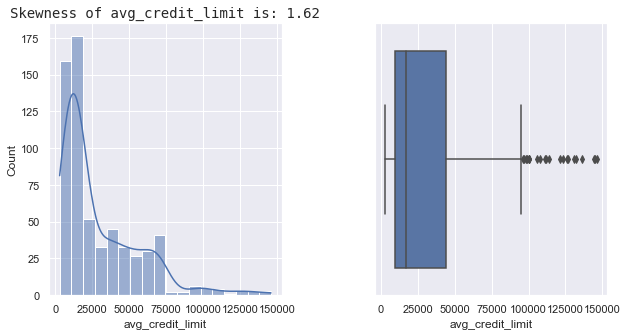

In [54]:
Hist_Box(df_z,'avg_credit_limit')

In [55]:
z = np.abs(stats.zscore(df_z.total_visits_online))
df_z = df_z[z<3]
df_z.shape

(607, 5)

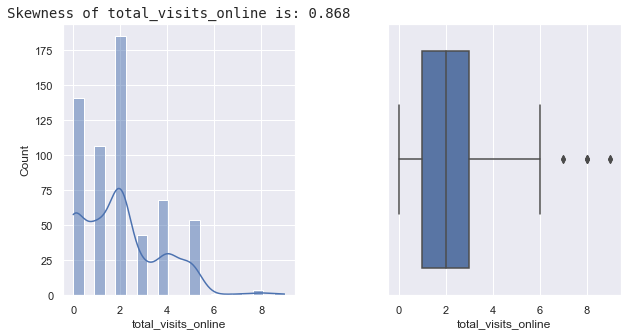

In [56]:
Hist_Box(df_z,'total_visits_online')

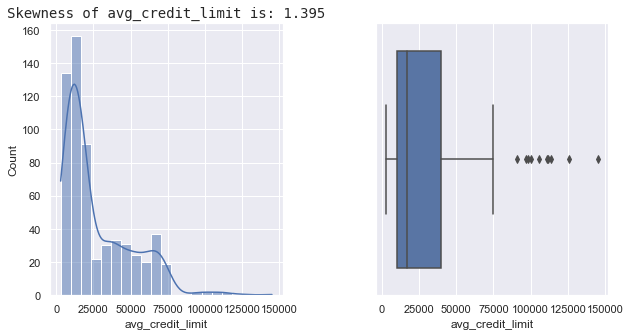

In [57]:
Hist_Box(df_z,'avg_credit_limit')

Use of median values

In [58]:
df_median = df_new__memory.copy()

In [59]:
df_median.shape

(649, 5)

In [60]:
print(df_median['avg_credit_limit'].quantile(0.50)) 
# np.median(df_median['avg_credit_limit']) # same thing
median = df_median['avg_credit_limit'].quantile(0.50)

18000.0


In [61]:
Q_1 = np.quantile(df_median['avg_credit_limit'],0.25)
Q_3 = np.quantile(df_median['avg_credit_limit'],0.75)
IQR = Q_3 - Q_1 
lower_bound = Q_1 - (1.5* IQR)
upper_bound = Q_3 + (1.5* IQR)
df_median['avg_credit_limit'] = np.where(
    df_median['avg_credit_limit']> upper_bound,median,
    np.where(df_median['avg_credit_limit']<lower_bound,median,
    df_median['avg_credit_limit'])) # Use of boundary  quantile capping

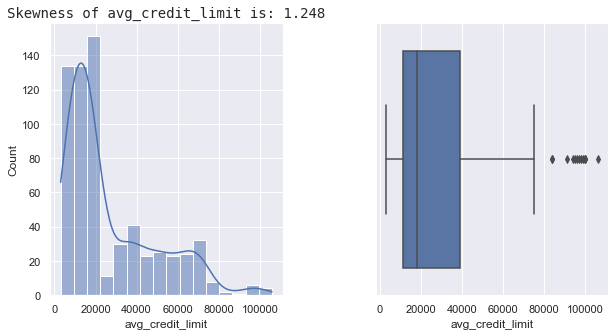

In [62]:
Hist_Box(df_median,'avg_credit_limit')

In [63]:
median = df_median['total_visits_online'].quantile(0.50)
Q_1 = np.quantile(df_median['total_visits_online'],0.25)
Q_3 = np.quantile(df_median['total_visits_online'],0.75)
IQR = Q_3 - Q_1 
lower_bound = Q_1 - (1.5* IQR)
upper_bound = Q_3 + (1.5* IQR)
df_median['total_visits_online'] = np.where(
    df_median['total_visits_online']> upper_bound,median,
    np.where(df_median['total_visits_online']<lower_bound,median,
    df_median['total_visits_online'])) # Use of boundary  quantile capping

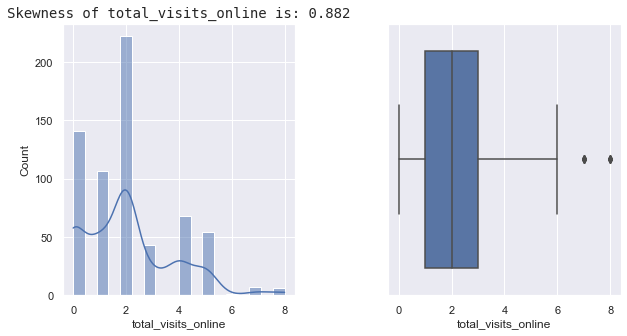

In [64]:
Hist_Box(df_median,'total_visits_online')

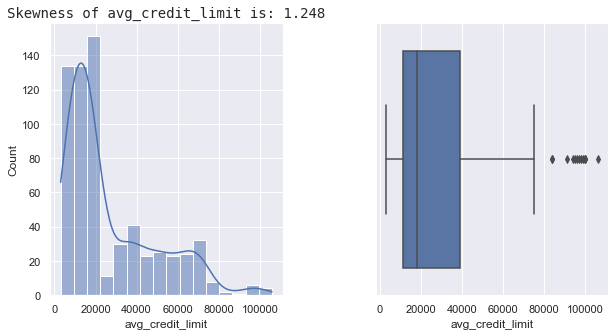

In [65]:
Hist_Box(df_median,'avg_credit_limit')

Use of log and median

In [66]:
# df_log_median = df_log.copy()

In [67]:
# median = df_log_median.avg_credit_limit_log.quantile(.50)

In [68]:
# Q_1 = np.quantile(df_log_median['avg_credit_limit_log'],0.25)
# Q_3 = np.quantile(df_log_median['avg_credit_limit_log'],0.75)
# IQR = Q_3 - Q_1 
# lower_bound = Q_1 - (1.5* IQR)
# upper_bound = Q_3 + (1.5* IQR)

In [69]:
# df_log_median.avg_credit_limit_log.where(df_log_median.avg_credit_limit_log>upper_bound,median,inplace=True)

best to use np.where clause than using the dataframe.where clause

In [70]:
# df_log_median['avg_credit_limit_log'] = np.where(
#                                                 df_log_median['avg_credit_limit_log']> upper_bound,
#                                                 median,
#                                                 df_log_median['avg_credit_limit_log'])  

In [71]:
# Hist_Box(df_log_median,'avg_credit_limit_log')

In [72]:
# median = df_log_median.total_visits_online_log.quantile(.50)

In [73]:
# Q_1 = np.quantile(df_log_median['total_visits_online_log'],0.25)
# Q_3 = np.quantile(df_log_median['total_visits_online_log'],0.75)
# IQR = Q_3 - Q_1 
# lower_bound = Q_1 - (1.5* IQR)
# upper_bound = Q_3 + (1.5* IQR)
# df_log_median['total_visits_online_log'] = np.where(
#                                                 df_log_median['total_visits_online_log']> upper_bound,
#                                                 median,
#                                                 df_log_median['total_visits_online_log'])  
# Hist_Box(df_log_median,'total_visits_online_log')

No need for combinations because log has taken care of the the outliers effectively.

Comparison of skewness values

originals

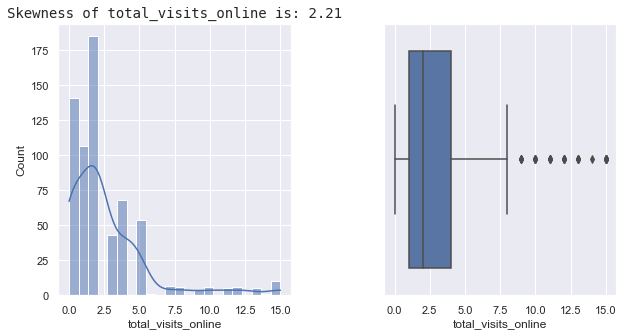

In [74]:
Hist_Box(df_new__memory,'total_visits_online')

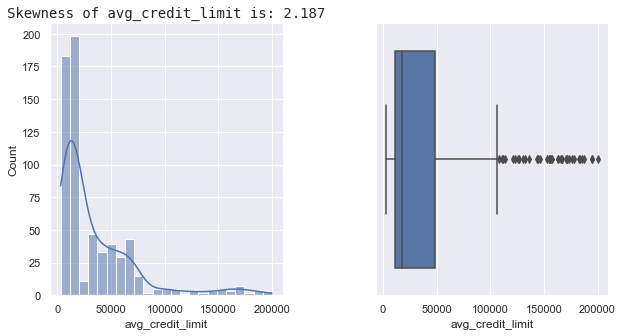

In [75]:
Hist_Box(df_new__memory,'avg_credit_limit')

log

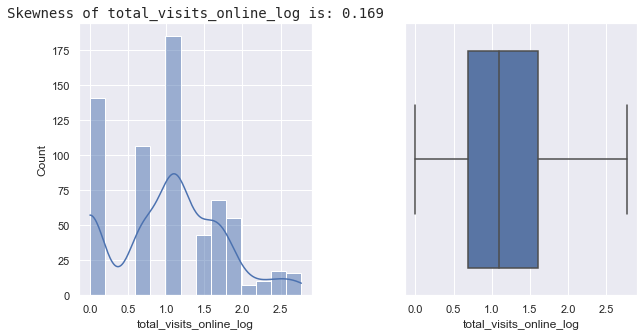

In [76]:
Hist_Box(df_log,'total_visits_online_log')

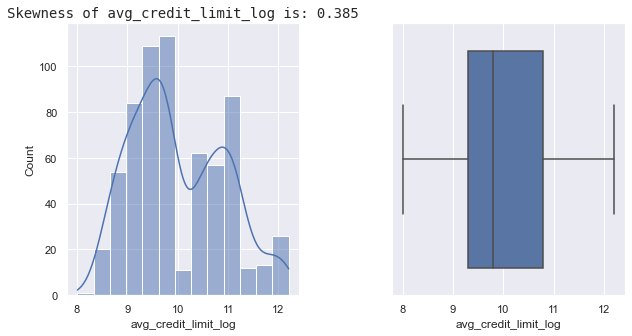

In [77]:
Hist_Box(df_log,'avg_credit_limit_log')

IQR

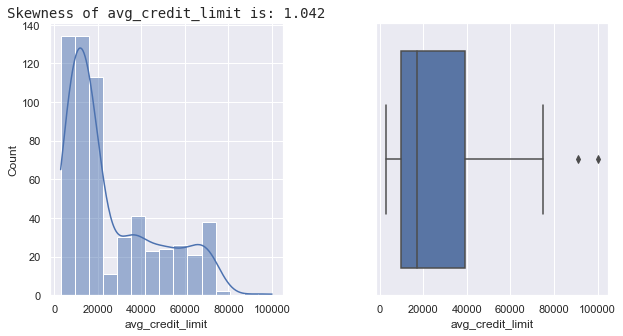

In [78]:
Hist_Box(df_iqr,'avg_credit_limit')

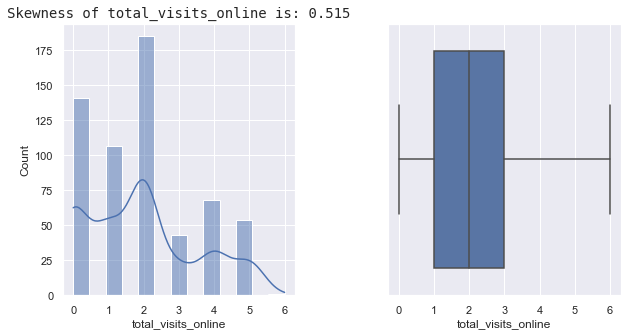

In [79]:
Hist_Box(df_iqr,'total_visits_online')

flooring and capping

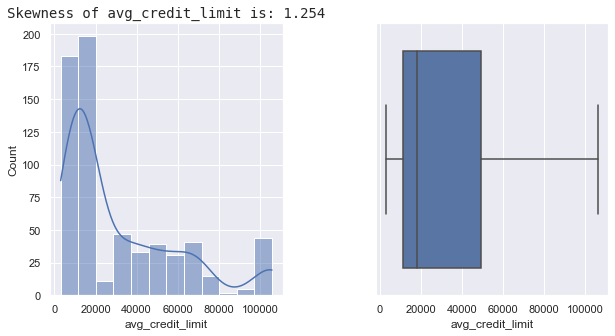

In [80]:
Hist_Box(df_flooring,'avg_credit_limit')

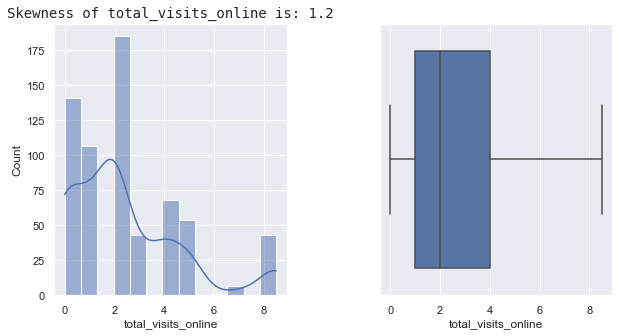

In [81]:
Hist_Box(df_flooring,'total_visits_online')

Z score

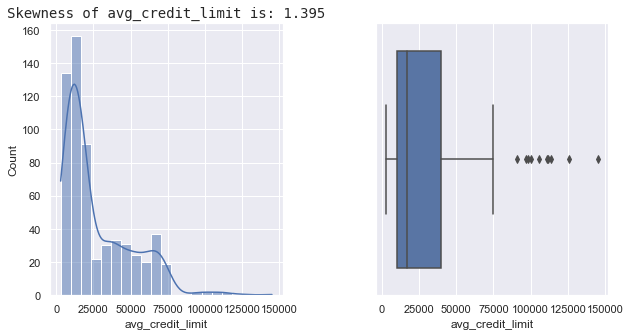

In [82]:
Hist_Box(df_z,'avg_credit_limit')

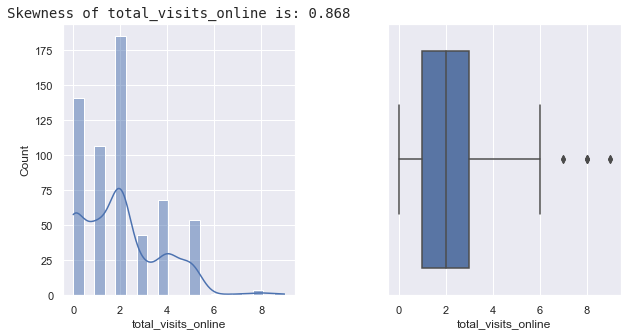

In [83]:
Hist_Box(df_z,'total_visits_online')

median 

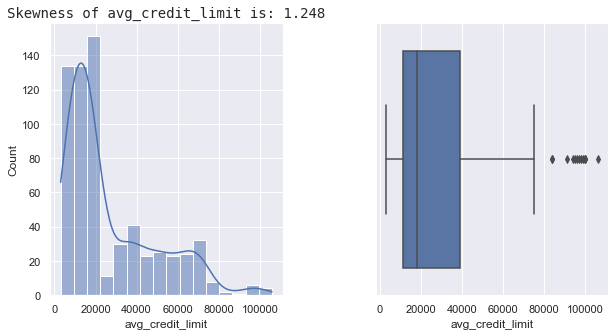

In [84]:
Hist_Box(df_median,'avg_credit_limit')

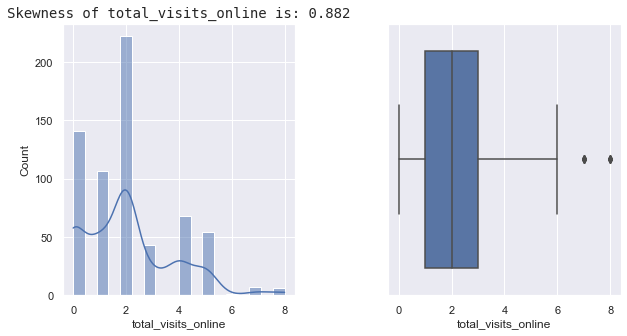

In [85]:
Hist_Box(df_median,'total_visits_online')

Observations from Skewnes treatment
|Method |total_visits_online|avg_credit_limit|
| ----------- | ----------- |----------- |
|original|2.21|2.187|
|log|0.169|0.385|
|IQR|0.515|1.042|
|Flooring|1.2|1.254|
|Z-score|0.868|1.395|
|median|0.882|1.248|

Levels of skewness
1. (-0.5,0.5) = lowly skewed
2. (-1.0-0.5) U (0.5,1) = Moderately skewed
3. (-1 & beyond ) U (1 & beyond) = Highly skewed

Log and Flooring take care of the outliers effectively than others, but the skewness value of Flooring is more than that of Log as shown in the table above.

## **Use of Clustering Methods**

In [86]:
df_cluster = df_flooring.copy()

In [87]:
from sklearn.preprocessing import  StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score,silhouette_samples

In [88]:
df_cluster.shape

(649, 5)

In [89]:
df_cluster.head()

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,100000.0,2,1,1.0,0
1,50000.0,3,0,8.5,9
2,50000.0,7,1,3.0,4
3,30000.0,5,1,1.0,4
4,100000.0,6,0,8.5,3


In [90]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()
df_flooring # Without scaling

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,100000.0,2,1,1.0,0
1,50000.0,3,0,8.5,9
2,50000.0,7,1,3.0,4
3,30000.0,5,1,1.0,4
4,100000.0,6,0,8.5,3
...,...,...,...,...,...
655,99000.0,10,1,8.5,0
656,84000.0,10,1,8.5,2
657,106000.0,8,1,8.5,1
658,106000.0,10,1,8.5,0


In [91]:
df_cluster_scaled_1 = scaler1.fit_transform(df_cluster)
df_cluster_scaled_3 = scaler3.fit_transform(df_cluster)

In [92]:
pd.DataFrame(df_cluster_scaled_3).describe()

,0,1,2,3,4
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.367934,-0.097072,0.132512,0.137391,0.147535
std,0.756819,0.724588,0.541716,0.755863,0.719478
min,-0.394737,-1.333333,-0.666667,-0.666667,-0.750000
25%,-0.184211,-0.666667,-0.333333,-0.333333,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.815789,0.333333,0.666667,0.666667,0.500000
max,2.315789,1.666667,1.000000,2.166667,1.750000


**Range of SC (Sihouette score) Interpretation**
|score| explanation|
|-----|-----|
|0.71-1.0	| A strong structure has been found|
|0.51-0.70	| A reasonable structure has been found|
|0.26-0.50	| The structure is weak and could be artificial|
|< 0.25	| No substantial structure has been found|

In [93]:
len(df_flooring)
len(df_cluster_scaled_1)

649

For n_clusters = 2 The average silhouette_score is : 0.41999597804777794
For n_clusters = 3 The average silhouette_score is : 0.5180797381243987
For n_clusters = 4 The average silhouette_score is : 0.37986496617829596
For n_clusters = 5 The average silhouette_score is : 0.3549475285485384


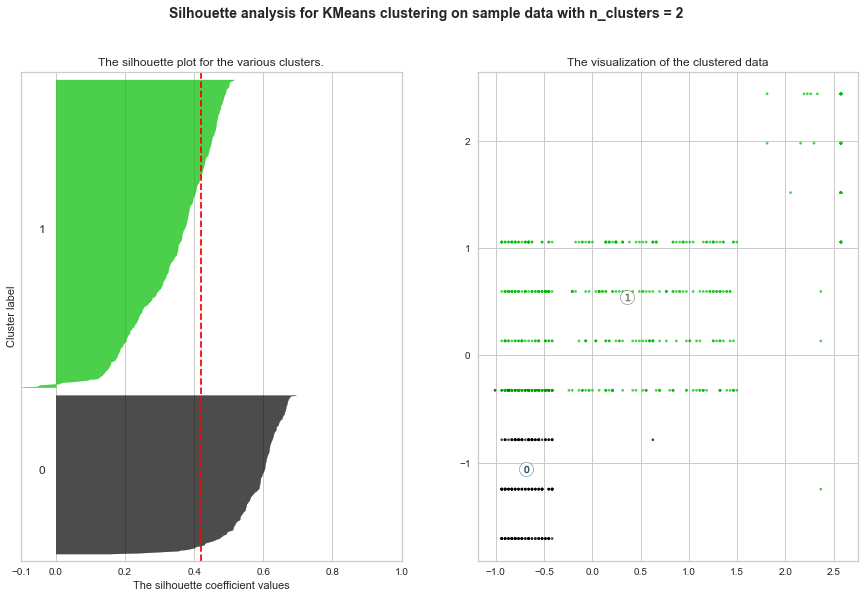

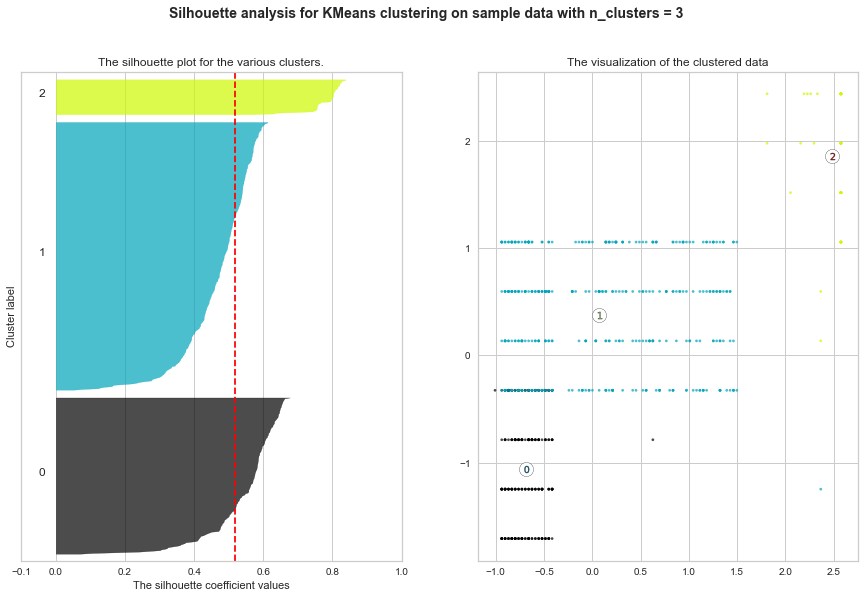

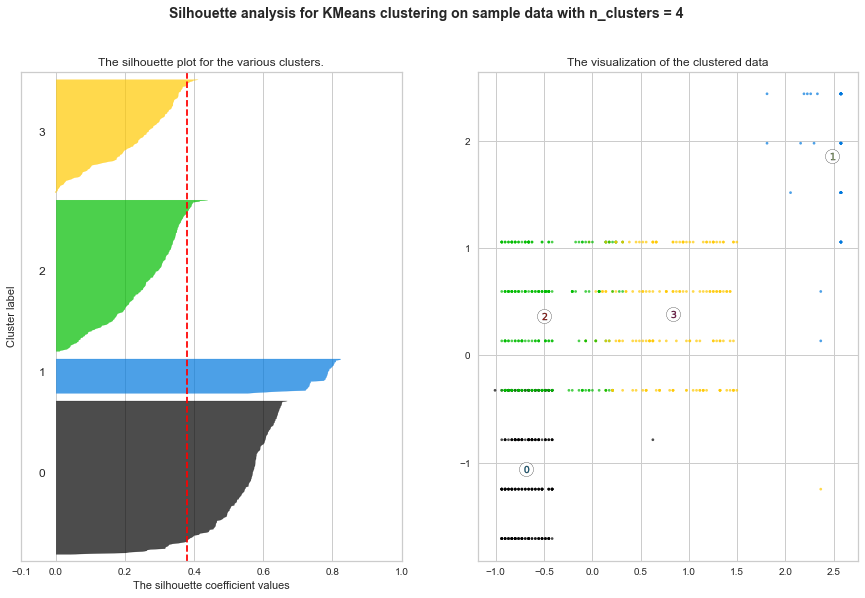

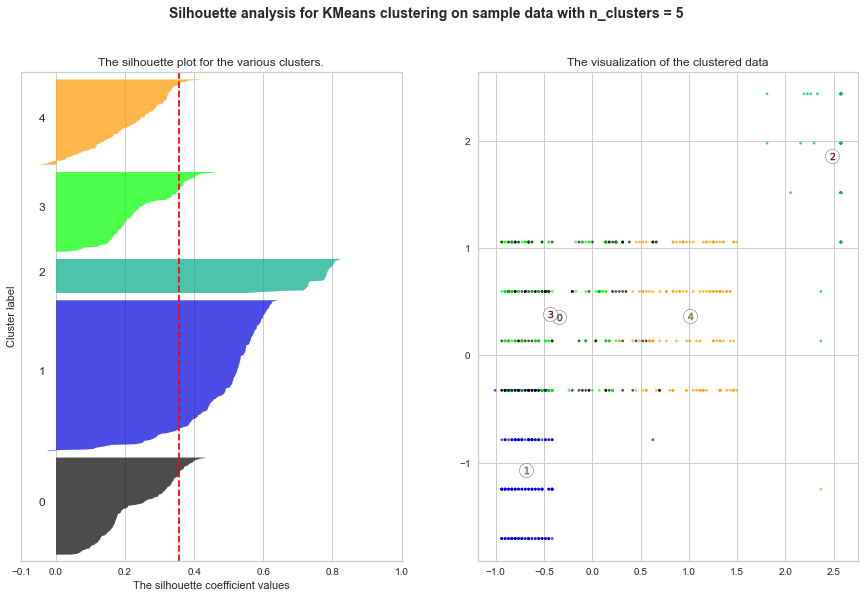

In [94]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4,5]

for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,2, figsize=(15,9))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax[0].set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax[0].set_ylim([0, len(df_cluster_scaled_1) + (n_clusters + 1) * 10])

    # Run Kmeans algorithm
    km = KMeans(n_clusters=n_clusters,random_state=42)
    cluster_labels = km.fit_predict(df_cluster_scaled_1)
    # centriods = km.cluster_centers_

    # Get silhouette samples
    silhouette_avg = silhouette_score(df_cluster_scaled_1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(df_cluster_scaled_1, cluster_labels)
    
    # Silhouette plot
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to 
        # cluster i and sort them 
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i)/ n_clusters)
        ax[0].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax[0].set_title("The silhouette plot for the various clusters.")
    ax[0].set_xlabel("The silhouette coefficient values")
    ax[0].set_ylabel("Cluster label")

    ax[0].axvline(x=silhouette_avg, color='red', linestyle='--')
    ax[0].set_yticks([]) # Clear the yaxis labels / ticks
    ax[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed 
    colors = cm.nipy_spectral(cluster_labels.astype(float)/ n_clusters)
    ax[1].scatter(
        df_cluster_scaled_1[:,0], df_cluster_scaled_1[:,1], marker=".", s=30, lw=0, alpha=0.7,
        c=colors, edgecolor='k'
    )

    # Labeling the clusters
    centers  = km.cluster_centers_
    # Draw white circles at the cluster centers 
    ax[1].scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax[1].scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax[1].set_title("The visualization of the clustered data")
    # ax[1].set_xlabel("Feature space for the 1st feature")
    # ax[1].set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Seems 3 clusters are optimal

### **KMeans Method**

Use of Yellow brick  Kelbow Visualiser

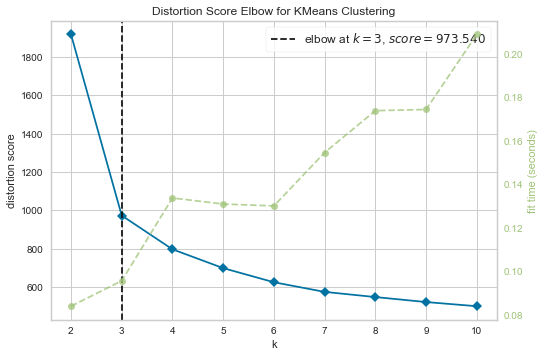

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
from yellowbrick.cluster import KElbowVisualizer
km =KMeans(random_state=30)
# visualiser = KElbowVisualizer(km,k=(2,11))
visualiser = KElbowVisualizer(km,k=(2,11), metric='distortion') # metric: distortion,silhouette ,calinski_harabasz
visualiser.fit(df_cluster_scaled_1)
visualiser.show() 

**Using Davies Evaluation technique**

In [96]:
from sklearn.metrics import davies_bouldin_score

db = {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(df_flooring)
    # if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    db[k] = davies_bouldin_score(df_cluster_scaled_1,clusters) # key, value pairs

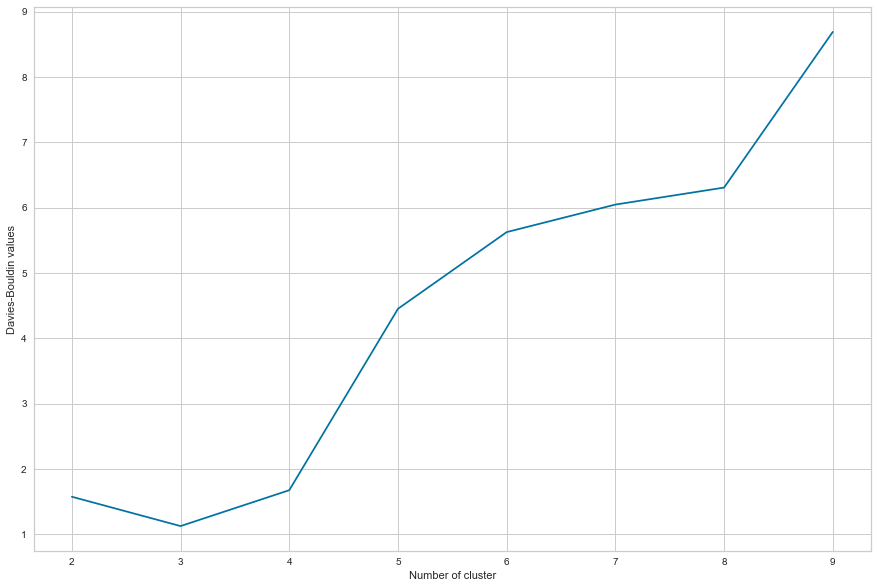

In [97]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

- A lower Davies-Bouldin index relates to a model with better separation between the clusters.
- Hence the best number of clusters based on the evaluation technique is 3 clusters

Text(0.5, 1.0, 'KMeans Elbow Curve')

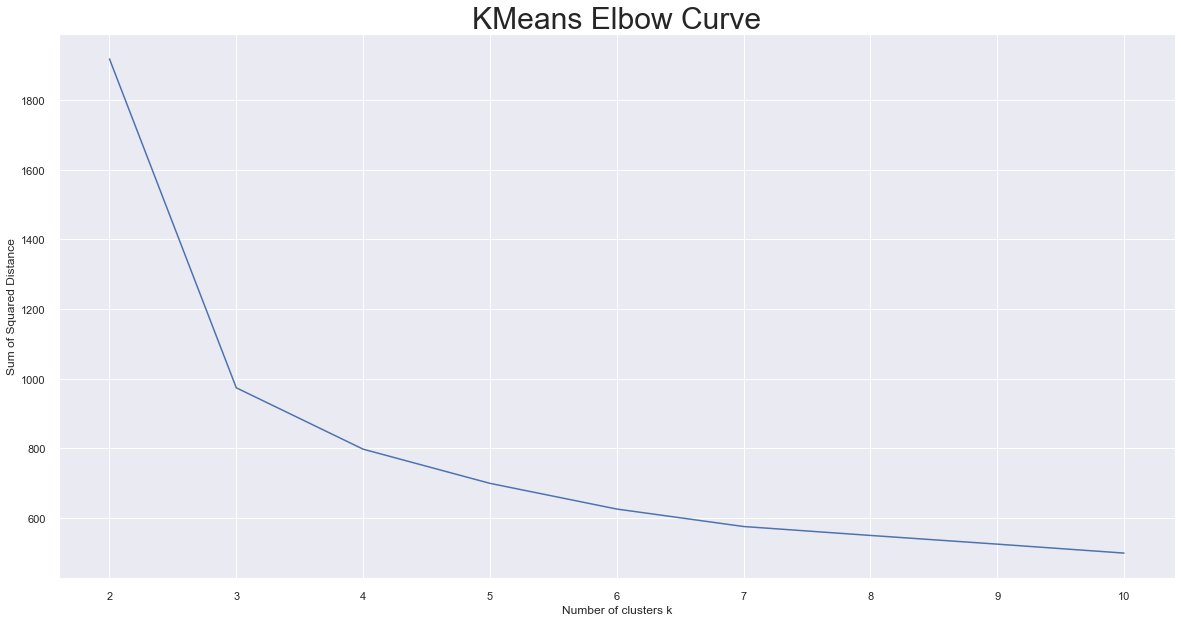

In [98]:
sum_of_squared_distance = []

k_list = list(range(2,11))

for k in k_list:
    km =KMeans(n_clusters=k,random_state=42)
    km.fit(df_cluster_scaled_1)
    sum_of_squared_distance.append(km.inertia_)

sns.set_theme(style="darkgrid")
# Plot sum_of_squared_distance against k 
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(k_list,sum_of_squared_distance,'bx-') #bx-
plt.xlabel("Number of clusters k")
plt.ylabel("Sum of Squared Distance")
plt.title("KMeans Elbow Curve",fontsize=30)
# plt.grid()

Optimal number of clusters are 3

In [99]:
df_cluster_scaled_1

array([[ 2.36693579, -1.24708705, -0.86060646, -0.62324389, -1.24844298],
       [ 0.62701493, -0.78670054, -1.47640975,  2.68678297,  1.88123746],
       [ 0.62701493,  1.05484553, -0.86060646,  0.25942994,  0.14252611],
       ...,
       [ 2.57572629,  1.51523205, -0.86060646,  2.68678297, -0.9007007 ],
       [ 2.57572629,  2.43600508, -0.86060646,  2.68678297, -1.24844298],
       [ 2.57572629,  1.97561857, -1.47640975,  2.68678297, -0.55295843]])

**Visualisaion of KMeans**

In [100]:
km = KMeans(n_clusters=3, random_state=42) # Use of 3 clusters
km.fit(df_cluster_scaled_1)
# km.labels_
km.cluster_centers_

array([[-0.6869796 , -1.05751613, -0.89404374,  0.50406239,  1.14798905],
       [ 0.07272586,  0.37279143,  0.66912713, -0.63141679, -0.55571829],
       [ 2.48664235,  1.85591807, -1.10692778,  2.54555516, -0.87288132]])

In [101]:
from collections import Counter
Counter(km.labels_)

Counter({1: 378, 0: 221, 2: 50})

In [102]:
from collections import Counter
labels =km.predict(df_cluster_scaled_1)
Counter(labels)

Counter({1: 378, 0: 221, 2: 50})

In [103]:
df_cluster_scaled_1.shape

(649, 5)

Text(0, 0.5, 'Other Features')

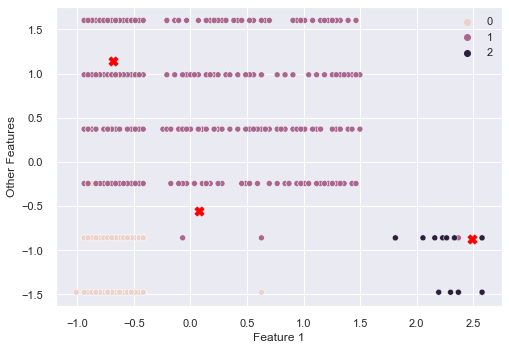

In [104]:
sns.scatterplot(x=df_cluster_scaled_1[:,0],y=df_cluster_scaled_1[:,2],hue=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,4]
,marker='X',s= 80, label="centriods",color='red')
plt.xlabel("Feature 1")
plt.ylabel("Other Features")

In [105]:
fig = px.scatter_3d(df_cluster_scaled_1,x=df_cluster_scaled_1[:,0],
                    y=df_cluster_scaled_1[:,1],z=df_cluster_scaled_1[:,2],
                    opacity=1,
                    size_max=18,
                    symbol=km.labels_,
                    color=km.labels_) # color=km.labels_, symbol=km.labels_

fig.update_layout(scene = dict(
                    xaxis_title='Feature 1',
                    yaxis_title='Feature 2',
                    zaxis_title='Others Features'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10)
                    )

# Hide colorbar axis
fig.update_layout(coloraxis_showscale=False)
# fig.update_traces(marker={'colorbar_xpad':0,
#                         'showscale':False})

fig.show()

### **Agglomerative Method**

In [106]:
range_n_clusters = list(range(2,11))
for k in range_n_clusters:

    # Run Kmeans algorithm
    ac = AgglomerativeClustering(n_clusters=k)
    labels = ac.fit_predict(df_cluster_scaled_1)
    # centriods = ac.cluster_centers_

    # Get the average silhouette score and plot it
    avg_score = silhouette_score(df_cluster_scaled_1,labels)

    print(f"Silhouette score at K {k} is: {avg_score}")

Silhouette score at K 2 is: 0.4199617640098909
Silhouette score at K 3 is: 0.5181509438874592
Silhouette score at K 4 is: 0.37033228869808654
Silhouette score at K 5 is: 0.3351996193443698
Silhouette score at K 6 is: 0.25051070844672135
Silhouette score at K 7 is: 0.2426211429874635
Silhouette score at K 8 is: 0.23674618247832138
Silhouette score at K 9 is: 0.22542354454435282
Silhouette score at K 10 is: 0.21315559100321754


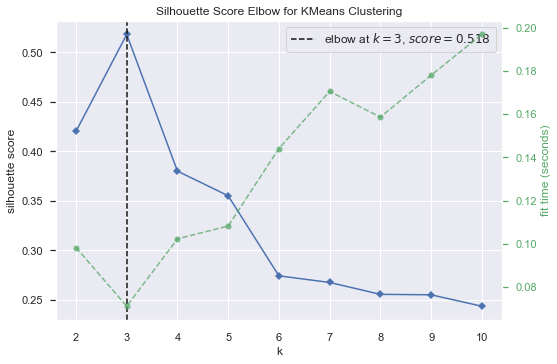

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [107]:
ac= AgglomerativeClustering()
visualiser = KElbowVisualizer(km,k=(2,11), metric='silhouette') # metric: distortion,silhouette ,calinski_harabasz
visualiser.fit(df_cluster_scaled_1)
visualiser.show()

**Using Davies Evaluation technique**

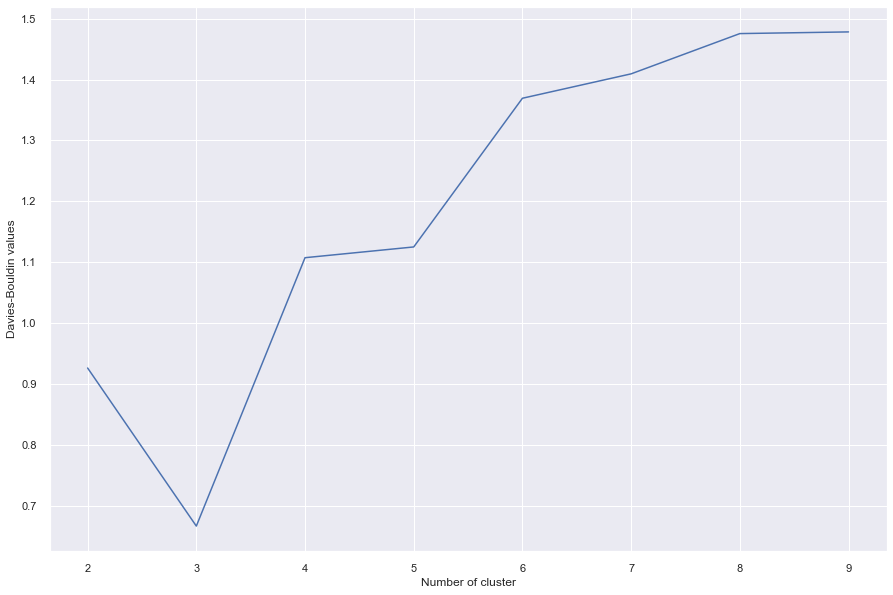

In [108]:
db = {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    ac = AgglomerativeClustering(n_clusters=k)
    labels = ac.fit_predict(df_cluster_scaled_1)
    # kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(x_pca)
    # if k == 3: labels = kmeans.labels_
    # clusters = kmeans.labels_
    db[k] = davies_bouldin_score(df_cluster_scaled_1,labels)

plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()    

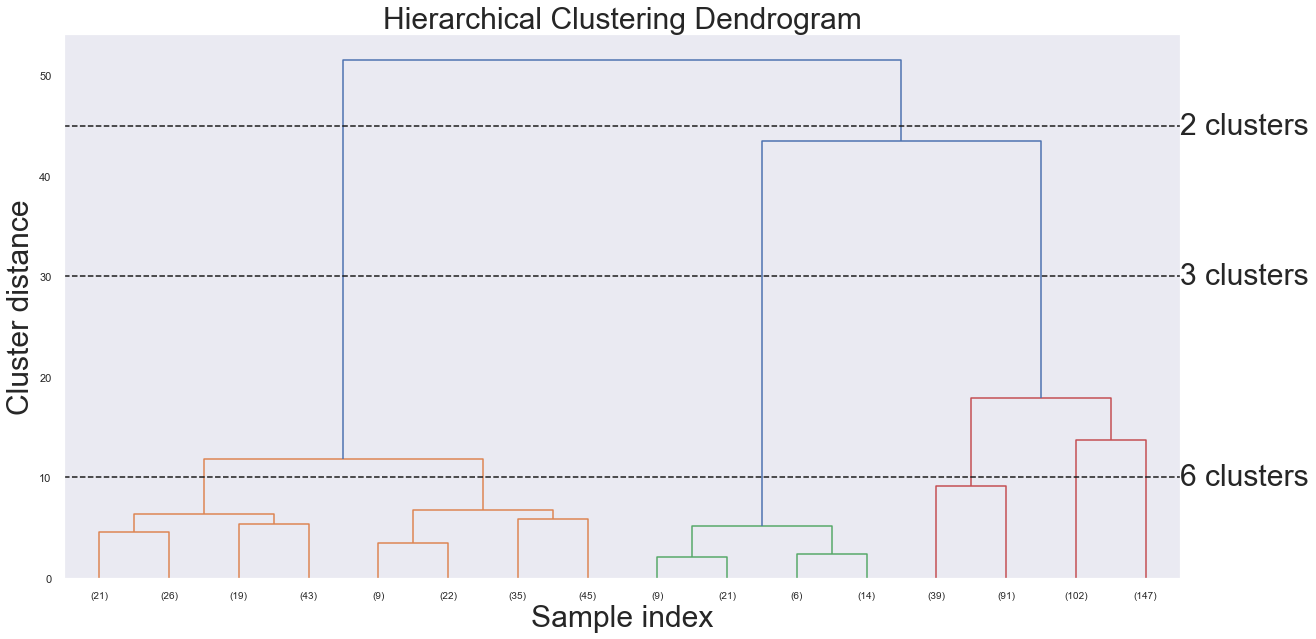

In [109]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples =len(model.labels_)
    for i,merge in enumerate(model.children_):
        current_count = 0 
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_,model.distances_,counts]
    ).astype(float)

    # plot corresponding dendrogram
    dendrogram(linkage_matrix,**kwargs)


sns.set_theme(style='dark')
fig,ax = plt.subplots(figsize=(20,10))
# Setting the algorithm
ac = AgglomerativeClustering(distance_threshold =0,n_clusters=None)
agg = ac.fit(df_cluster_scaled_1)
plt.title("Hierarchical Clustering Dendrogram",fontdict={'size':30})
# plot the top 4 levels
plot_dendrogram(agg,truncate_mode='level',p=3)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [45, 45], '--', c='k')
ax.plot(bounds, [30, 30], '--', c='k')
ax.plot(bounds, [10, 10], '--', c='k')
ax.text(bounds[1],45,'2 clusters',va ='center',fontdict={'size':30})
ax.text(bounds[1],30,'3 clusters', va ='center',fontdict={'size':30})
ax.text(bounds[1],10,'6 clusters', va ='center',fontdict={'size':30})
# plt.xlabel("Number of points in node(or index of point if no parenthesis ).")
plt.xlabel("Sample index",fontdict={'size':30})
# plt.xticks(rotation=45, ha="right",fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("Cluster distance",fontdict={'size':30})
plt.show()

### **DBSCAN Method**

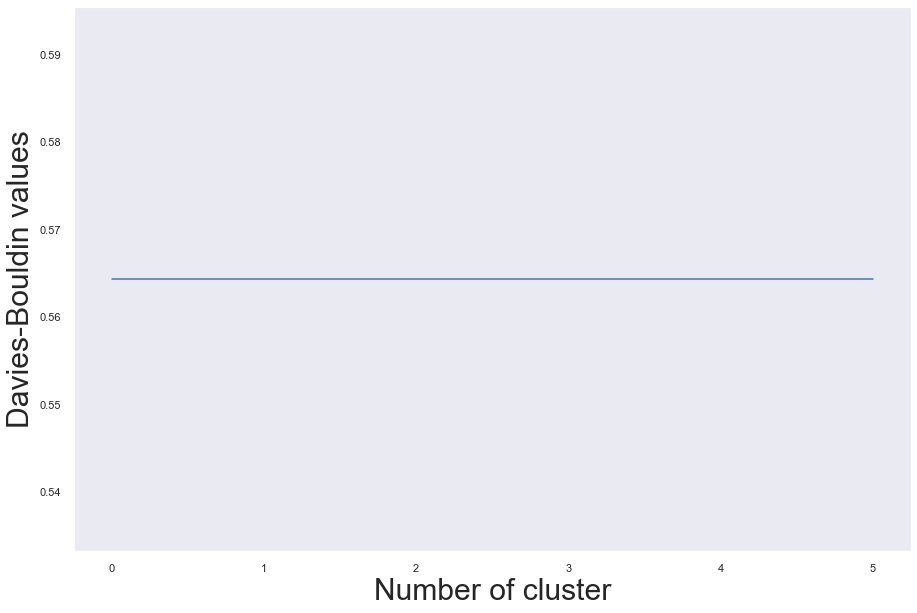

In [110]:
# Using Davies Bouldin
db = {}

eps_list = [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
samples = [5,10,15,20,25,30]
for i in range(len(eps_list)):
    for k in range(len(samples)):
        dbscan = DBSCAN(eps=eps_list[i],min_samples=samples[k])
        clusters = dbscan.fit_predict(df_cluster_scaled_1)
        n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise_ = list(clusters).count(-1)
        db[k] = davies_bouldin_score(df_cluster_scaled_1,clusters)



plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster",fontdict={'size':30})
plt.ylabel("Davies-Bouldin values",fontdict={'size':30})
plt.show()

#  2-3 clusters are the bet for this 

In [111]:
# Uncomment this to run the code below
# Using Silhouette
eps_list = [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
samples = [5,10,15,20,25,30]
for i in range(len(eps_list)):
    for k in range(len(samples)):
        dbscan = DBSCAN(eps=eps_list[i],min_samples=samples[k])
        clusters = dbscan.fit_predict(df_cluster_scaled_1)
        n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise_ = list(clusters).count(-1)
        silhouette_scoring = silhouette_score(df_cluster_scaled_1,clusters)
        if silhouette_scoring > 0.4:
            print(f"At eps:{eps_list[i]} and min_samples {samples[k]}")
            print(f"Estimated number of clusters: {n_clusters_}" )
            print(f"Estimated number of noise points:  {n_noise_}")
            print(f"Silhouette score: {silhouette_scoring}\n")
            

At eps:2 and min_samples 5
Estimated number of clusters: 2
Estimated number of noise points:  0
Silhouette score: 0.517403239703177

At eps:2 and min_samples 10
Estimated number of clusters: 2
Estimated number of noise points:  0
Silhouette score: 0.517403239703177

At eps:2 and min_samples 15
Estimated number of clusters: 2
Estimated number of noise points:  0
Silhouette score: 0.517403239703177

At eps:2 and min_samples 20
Estimated number of clusters: 2
Estimated number of noise points:  0
Silhouette score: 0.517403239703177

At eps:2 and min_samples 25
Estimated number of clusters: 2
Estimated number of noise points:  0
Silhouette score: 0.517403239703177

At eps:2 and min_samples 30
Estimated number of clusters: 2
Estimated number of noise points:  0
Silhouette score: 0.517403239703177



In [112]:
labels = dbscan.labels_
# labels

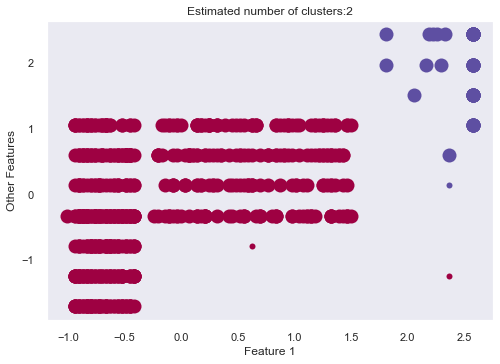

In [113]:
core_samples_mask = np.zeros_like(dbscan.labels_,dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0,0,0,1]

    class_member_mask = labels == k

    xy = df_cluster_scaled_1[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=14

    )

    xy = df_cluster_scaled_1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters:{n_clusters_}")
plt.xlabel('Feature 1')
plt.ylabel('Other Features')
plt.show()

In [114]:
fig = px.scatter_3d(df_cluster_scaled_1,x=df_cluster_scaled_1[:,0],
                    y=df_cluster_scaled_1[:,1],z=df_cluster_scaled_1[:,2],
                    opacity=1,
                    size_max=18,
                    symbol=dbscan.labels_,
                    color=dbscan.labels_) # color=km.labels_, symbol=km.labels_

fig.update_layout(scene = dict(
                    xaxis_title='Feature 1',
                    yaxis_title='Feature 2',
                    zaxis_title='Others Features'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10)
                    )

# Hide colorbar axis
fig.update_layout(coloraxis_showscale=False)
# fig.update_traces(marker={'colorbar_xpad':0,
#                         'showscale':False})

fig.show()

### **Analysing the Results Clustering (KMeans)**

In [115]:
km = KMeans(n_clusters=3, random_state=42) # Use of 3 clusters
km.fit(df_cluster_scaled_1)
# km.labels_
# km.cluster_centers_
Counter(km.labels_)

Counter({1: 378, 0: 221, 2: 50})

In [116]:
# appending the clusters back into the dataset
df_cluster2 = df_cluster.copy()
df_cluster2['cluster_label'] = km.labels_

0 - Low Credit Customers 

1 - Average Credit Customers 

2 - High Credit Customers

In [117]:
df_cluster2.sample(n=5)

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,cluster_label
492,50000.0,6,4,2.0,0,1
109,18000.0,4,2,3.0,8,0
142,9000.0,4,1,4.0,8,0
16,15000.0,2,1,2.0,4,0
100,11000.0,1,0,5.0,6,0


In [118]:
features = ['avg_credit_limit','total_credit_cards','total_visits_bank','total_visits_online', 'total_calls_made']

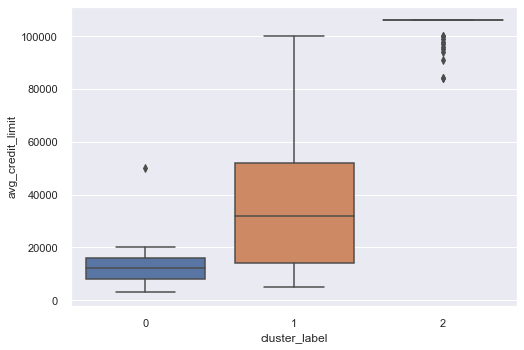

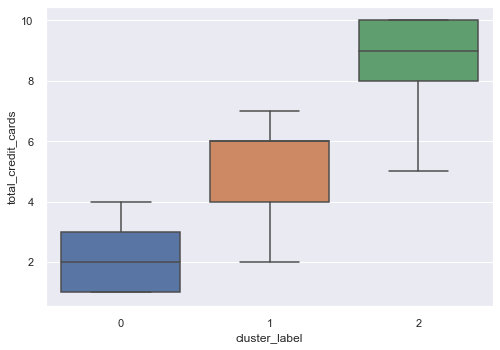

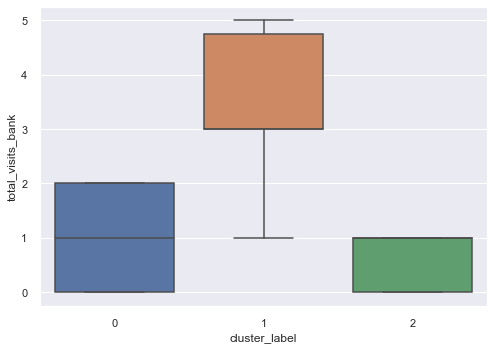

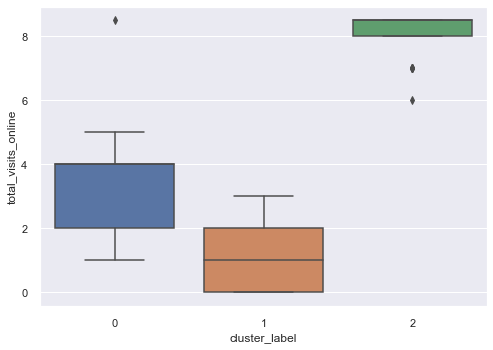

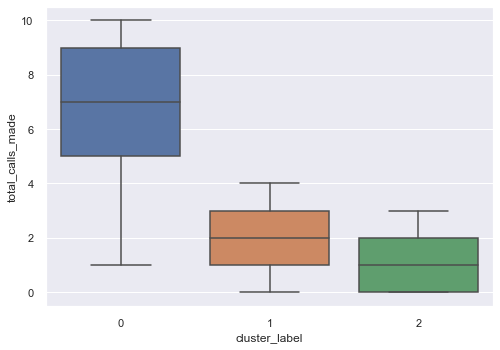

In [119]:
# fig,ax = plt.subplots(figsize=(10,10))
fontdict={"fontsize":25,"fontfamily":'monospace'}
sns.set_style('darkgrid')
for feature in features:
    sns.boxplot(data=df_cluster2, x='cluster_label',y=feature)
    plt.show()

## **RFM Analysis**

In [120]:
df_RFM = df_cluster2.copy()

Here, since there is no specific column to mention the time of the most frequent visit. Let's assume that the data is filtered based on most recent visit. So, let's give an arbitrary value of 10 to recency.

In [121]:
df_RFM['recency']= [10] * len(df_RFM)
df_RFM

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,cluster_label,recency
0,100000.0,2,1,1.0,0,1,10
1,50000.0,3,0,8.5,9,0,10
2,50000.0,7,1,3.0,4,1,10
3,30000.0,5,1,1.0,4,1,10
4,100000.0,6,0,8.5,3,2,10
...,...,...,...,...,...,...,...
655,99000.0,10,1,8.5,0,2,10
656,84000.0,10,1,8.5,2,2,10
657,106000.0,8,1,8.5,1,2,10
658,106000.0,10,1,8.5,0,2,10


We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company. Here, we will use the metric Total_visits_bank + Total_visits_online + Total_calls_made to calculate frequency.

In [122]:
total_metric = df_RFM['total_visits_bank'] +df_RFM['total_visits_online']+df_RFM['total_calls_made']

In [123]:
df_RFM['frequency'] =  total_metric

In [124]:
df_RFM

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,cluster_label,recency,frequency
0,100000.0,2,1,1.0,0,1,10,2.0
1,50000.0,3,0,8.5,9,0,10,17.5
2,50000.0,7,1,3.0,4,1,10,8.0
3,30000.0,5,1,1.0,4,1,10,6.0
4,100000.0,6,0,8.5,3,2,10,11.5
...,...,...,...,...,...,...,...,...
655,99000.0,10,1,8.5,0,2,10,9.5
656,84000.0,10,1,8.5,2,2,10,11.5
657,106000.0,8,1,8.5,1,2,10,10.5
658,106000.0,10,1,8.5,0,2,10,9.5


Here we are calculating the monetary value of customer using the column Avg_Credit_Limit.

In [125]:
### Ranking Customer’s based upon their recency, frequency, and monetary score

df_RFM['r_rank'] =  df_RFM['recency'].rank(ascending=False)
df_RFM['f_rank'] =  df_RFM['frequency'].rank(ascending=True)
df_RFM['m_rank'] =  df_RFM['avg_credit_limit'].rank(ascending=True)

In [126]:
df_RFM

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,cluster_label,recency,frequency,r_rank,f_rank,m_rank
0,100000.0,2,1,1.0,0,1,10,2.0,325.0,6.5,609.0
1,50000.0,3,0,8.5,9,0,10,17.5,325.0,649.0,494.5
2,50000.0,7,1,3.0,4,1,10,8.0,325.0,311.5,494.5
3,30000.0,5,1,1.0,4,1,10,6.0,325.0,159.0,400.5
4,100000.0,6,0,8.5,3,2,10,11.5,325.0,540.0,609.0
...,...,...,...,...,...,...,...,...,...,...,...
655,99000.0,10,1,8.5,0,2,10,9.5,325.0,418.5,607.0
656,84000.0,10,1,8.5,2,2,10,11.5,325.0,540.0,599.5
657,106000.0,8,1,8.5,1,2,10,10.5,325.0,494.0,630.0
658,106000.0,10,1,8.5,0,2,10,9.5,325.0,418.5,630.0


In [127]:
# Normalizing the rank of the customers
df_RFM['r_rank_norm'] =  (df_RFM['r_rank']/df_RFM['r_rank'].max()) * 100
df_RFM['f_rank_norm'] =  (df_RFM['f_rank']/df_RFM['f_rank'].max()) * 100
df_RFM['m_rank_norm'] =  (df_RFM['m_rank']/df_RFM['m_rank'].max()) * 100



df_RFM.drop(columns=['r_rank','f_rank','m_rank'], inplace=True)

# df_RFM

In [128]:
rfm_score = total_metric = 0.15 * df_RFM['r_rank_norm'] + 0.28*df_RFM['f_rank_norm']+ 0.57 *df_RFM['m_rank_norm']
df_RFM['rfm_score'] = rfm_score

In [129]:
# Scaling the RFM Score to a scale of 5
df_RFM['rfm_score'] *= 0.05
df_RFM

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,cluster_label,recency,frequency,r_rank_norm,f_rank_norm,m_rank_norm,rfm_score
0,100000.0,2,1,1.0,0,1,10,2.0,100.0,1.001541,96.666667,3.519022
1,50000.0,3,0,8.5,9,0,10,17.5,100.0,100.000000,78.492063,4.387024
2,50000.0,7,1,3.0,4,1,10,8.0,100.0,47.996918,78.492063,3.658981
3,30000.0,5,1,1.0,4,1,10,6.0,100.0,24.499230,63.571429,2.904775
4,100000.0,6,0,8.5,3,2,10,11.5,100.0,83.204931,96.666667,4.669869
...,...,...,...,...,...,...,...,...,...,...,...,...
655,99000.0,10,1,8.5,0,2,10,9.5,100.0,64.483821,96.349206,4.398726
656,84000.0,10,1,8.5,2,2,10,11.5,100.0,83.204931,95.158730,4.626893
657,106000.0,8,1,8.5,1,2,10,10.5,100.0,76.117103,100.000000,4.665639
658,106000.0,10,1,8.5,0,2,10,9.5,100.0,64.483821,100.000000,4.502773


RFM < 3 - Low Credit Customers 

4 > RFM >= 3 - Average Credit Customers 

RFM score >= 4 - High Credit Customers

In [147]:
# Finding out the customer segment using cluster scaling labels

df_RFM['rfm_segment'] = np.where(
    df_RFM.rfm_score > 4,'High Credit Customers', np.where(
       df_RFM.rfm_score > 3, 'Average Credit Customers','Low Credit Customers'
    )
)

In [154]:
# Finding out the customer segment using cluster scaling labels

df_RFM['rfm_segment'] = np.where(
    df_RFM.rfm_score >= 4.000,'High Credit Customers', np.where(
       df_RFM.rfm_score >= 3.000, 'Average Credit Customers',np.where(df_RFM.rfm_score == 3, 'Average Credit Customers','Low Credit Customers')
    )
)

In [155]:
df_RFM.to_csv('scaled_clusters.csv')

In [157]:
df_RFM

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,cluster_label,recency,frequency,r_rank_norm,f_rank_norm,m_rank_norm,rfm_score,rfm_segment
0,100000.0,2,1,1.0,0,1,10,2.0,100.0,1.001541,96.666667,3.519022,Average Credit Customers
1,50000.0,3,0,8.5,9,0,10,17.5,100.0,100.000000,78.492063,4.387024,High Credit Customers
2,50000.0,7,1,3.0,4,1,10,8.0,100.0,47.996918,78.492063,3.658981,Average Credit Customers
3,30000.0,5,1,1.0,4,1,10,6.0,100.0,24.499230,63.571429,2.904775,Low Credit Customers
4,100000.0,6,0,8.5,3,2,10,11.5,100.0,83.204931,96.666667,4.669869,High Credit Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,99000.0,10,1,8.5,0,2,10,9.5,100.0,64.483821,96.349206,4.398726,High Credit Customers
656,84000.0,10,1,8.5,2,2,10,11.5,100.0,83.204931,95.158730,4.626893,High Credit Customers
657,106000.0,8,1,8.5,1,2,10,10.5,100.0,76.117103,100.000000,4.665639,High Credit Customers
658,106000.0,10,1,8.5,0,2,10,9.5,100.0,64.483821,100.000000,4.502773,High Credit Customers


In [173]:
fig = px.pie(df_RFM, values='cluster_label', names='rfm_segment', title='SEGEMENATION BASED ON RFM')
fig.show()

In [185]:
def pie_chart(df,x:str):
    try:
        fig = px.pie(df, values=x, names='rfm_segment', title=f'SEGEMENATION BASED ON {x}')
        fig.show()
    except ValueError:
        print(f"Wrong Value value\n These are the available keys:\n{df.columns}")

In [189]:
pie_chart(df_RFM,'frequency')

Text(0.5, 0, 'Cluster Labels')

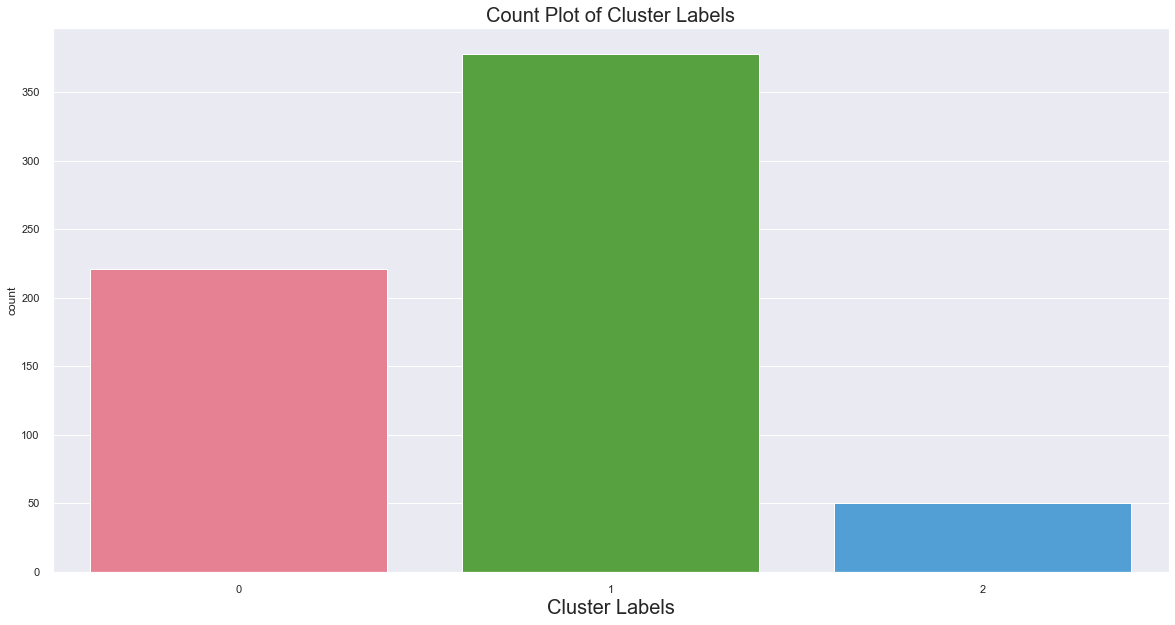

In [193]:
fig,ax = plt.subplots(figsize=(20,10))
my_colors1 = sns.set_palette('husl',3)
sns.countplot(data=df_RFM,x=df_RFM.cluster_label,palette=my_colors1)
ax.set_title('Count Plot of Cluster Labels', fontsize=20)
ax.set_xlabel('Cluster Labels',fontsize=20)

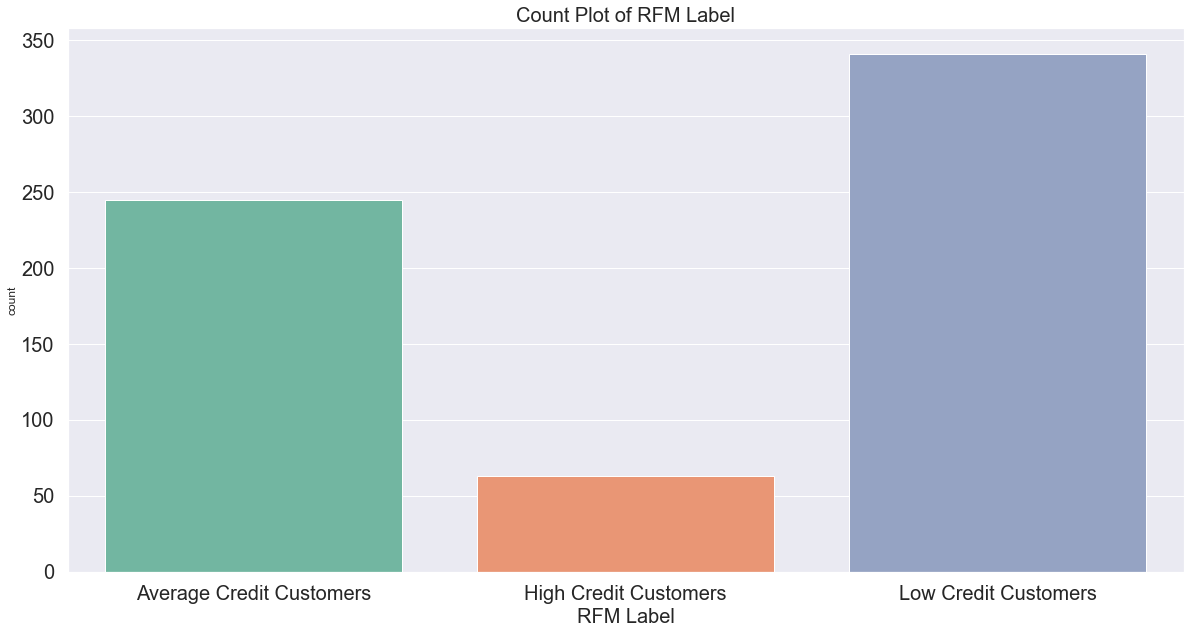

In [212]:
fig,ax = plt.subplots(figsize=(20,10))
my_colors1 = sns.set_palette('Set2')
sns.countplot(data=df_RFM,x=df_RFM.rfm_segment,palette=my_colors1)
ax.set_xlabel('RFM Label',fontsize=20)
ax.set_title('Count Plot of RFM Label', fontsize=20)


def tick_var(x):
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=x)
    ax.tick_params(axis='both', which='minor', labelsize=x)
tick_var(20)

In [166]:
df_RFM

,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,cluster_label,recency,frequency,r_rank_norm,f_rank_norm,m_rank_norm,rfm_score,rfm_segment
0,100000.0,2,1,1.0,0,1,10,2.0,100.0,1.001541,96.666667,3.519022,Average Credit Customers
1,50000.0,3,0,8.5,9,0,10,17.5,100.0,100.000000,78.492063,4.387024,High Credit Customers
2,50000.0,7,1,3.0,4,1,10,8.0,100.0,47.996918,78.492063,3.658981,Average Credit Customers
3,30000.0,5,1,1.0,4,1,10,6.0,100.0,24.499230,63.571429,2.904775,Low Credit Customers
4,100000.0,6,0,8.5,3,2,10,11.5,100.0,83.204931,96.666667,4.669869,High Credit Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,99000.0,10,1,8.5,0,2,10,9.5,100.0,64.483821,96.349206,4.398726,High Credit Customers
656,84000.0,10,1,8.5,2,2,10,11.5,100.0,83.204931,95.158730,4.626893,High Credit Customers
657,106000.0,8,1,8.5,1,2,10,10.5,100.0,76.117103,100.000000,4.665639,High Credit Customers
658,106000.0,10,1,8.5,0,2,10,9.5,100.0,64.483821,100.000000,4.502773,High Credit Customers


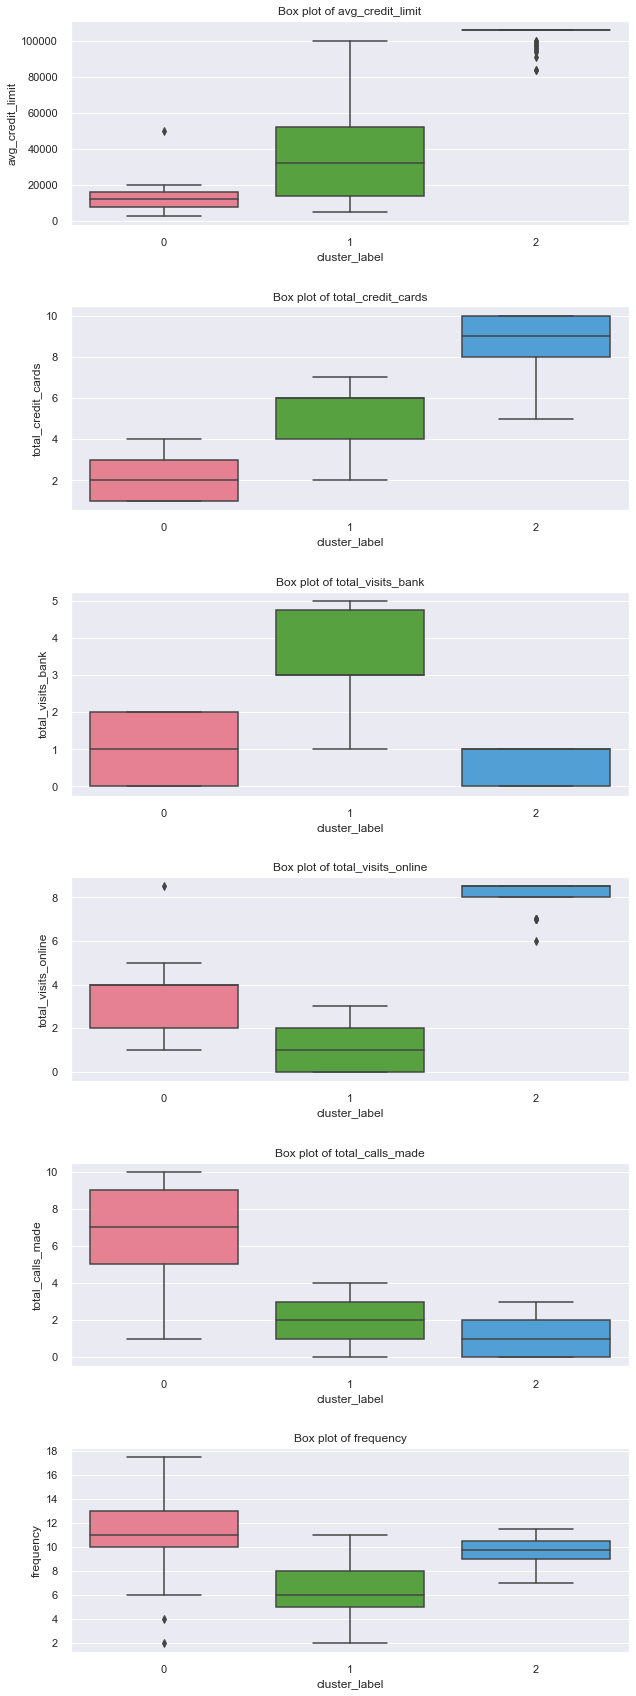

In [168]:
fig,ax = plt.subplots(6, figsize=(10,30))
fontdict={"fontsize":25,"fontfamily":'monospace'}
sns.set_style('darkgrid')
# for feature in features:
#     sns.boxplot(data=df_cluster2, x='cluster_label',y=feature)
#     plt.show()
features =['avg_credit_limit', 'total_credit_cards', 'total_visits_bank',
       'total_visits_online', 'total_calls_made',
       'frequency']

for index,value in enumerate(features):
    sns.boxplot(data=df_RFM, x='cluster_label',y=value, ax=ax[index])
    plt.subplots_adjust(hspace=0.4)
    ax[index].set_title(f'Box plot of {value}')

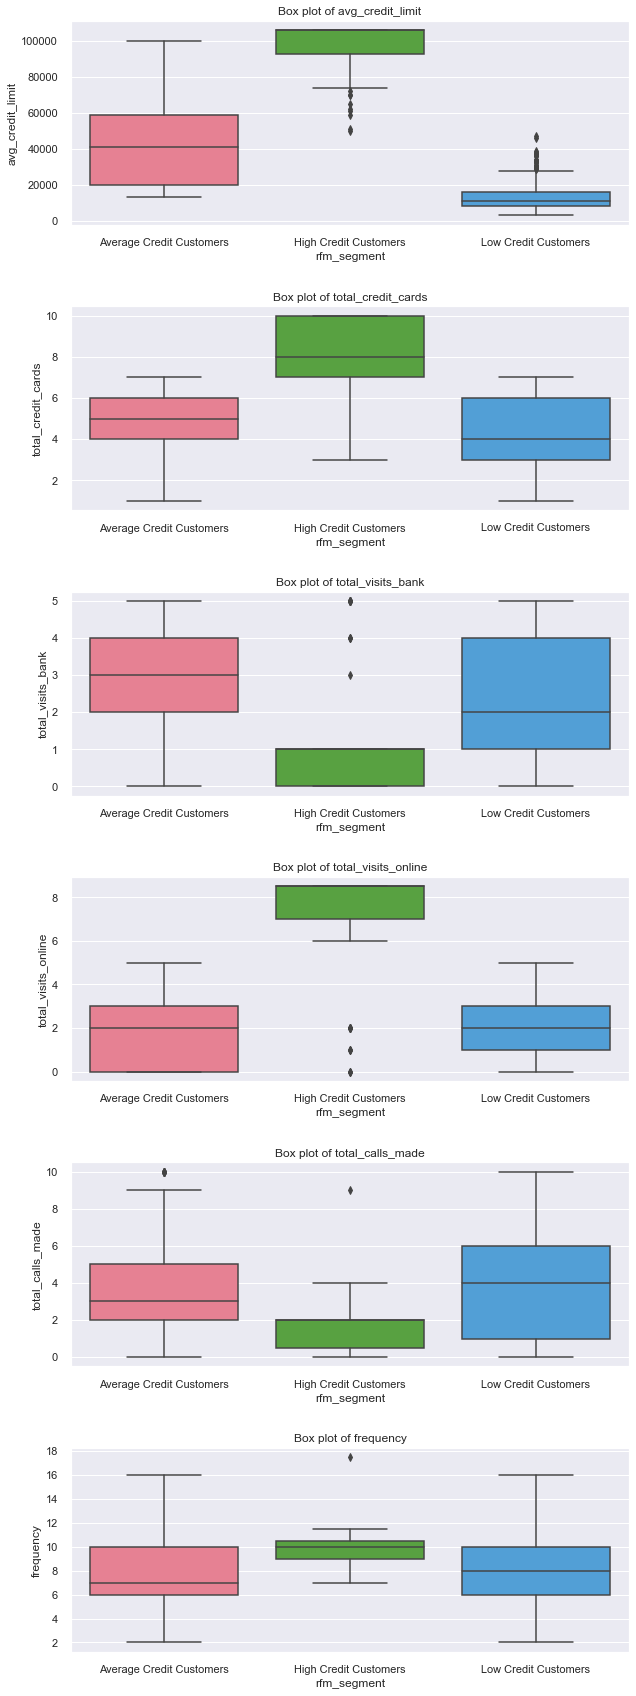

In [171]:
fig,ax = plt.subplots(6, figsize=(10,30))
fontdict={"fontsize":25,"fontfamily":'monospace'}
sns.set_style('darkgrid')

for index,value in enumerate(features):
    sns.boxplot(data=df_RFM, x='rfm_segment',y=value, ax=ax[index])
    plt.subplots_adjust(hspace=0.4)
    ax[index].set_title(f'Box plot of {value}')